<h1>7. Machine Learning für Zeitreihen: Time Series Clustering</h1>
<h4>Session 7 (Freitag 13:30 – 15:00)</h4>
<br>
7.1 Clustering, Beispiel: Städteklimacluster<br>
7.2 Clustering, Beispiel: Stromverbrauchercluster<br>

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import warnings
from tslearn.clustering import TimeSeriesKMeans

In [28]:
temp = pd.read_csv('temperature.csv')
temp = temp.dropna().reset_index().drop('index',axis=1)
temp['datetime'] = pd.to_datetime(temp['datetime'])
temp.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
1,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
3,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
4,2012-10-01 17:00:00,284.622911,282.109095,289.431869,281.775065,291.852162,291.563063,293.370249,296.677445,285.392738,...,285.944057,288.485467,285.874069,287.322831,306.898887,304.194188,310.243077,304.4,304.4,303.5


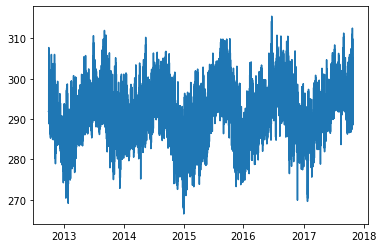

In [29]:
cities_list = time_series_data.columns.tolist()[1:]
plt.plot(time_series_data['datetime'],time_series_data[cities_list[4]]);

In [31]:
temp.set_index('datetime', inplace=True)

In [32]:
td = temp.resample("D").mean()
td.head().round(2)

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,284.62,282.12,289.42,281.77,291.85,291.57,293.36,296.70,285.48,284.58,...,286.04,288.57,285.89,287.37,306.62,304.25,310.16,304.40,304.40,303.50
2012-10-02,286.15,286.14,292.96,285.16,295.89,295.29,297.25,301.21,289.77,286.23,...,289.24,290.89,286.94,289.01,302.23,302.79,306.76,303.90,303.90,302.68
2012-10-03,285.53,289.60,296.93,287.67,299.01,297.88,300.69,302.87,291.21,288.75,...,290.35,290.07,287.37,289.02,301.19,301.69,303.29,301.56,301.50,301.26
2012-10-04,284.37,286.48,295.69,284.39,296.00,296.08,301.82,302.23,293.10,291.59,...,293.63,291.99,286.86,290.04,300.09,299.94,301.77,299.14,299.14,298.92
2012-10-05,283.76,288.29,290.64,284.76,292.95,293.89,300.63,301.81,292.83,280.71,...,294.02,294.04,287.54,289.52,299.71,300.15,299.86,298.88,298.88,297.55


<AxesSubplot:xlabel='datetime'>

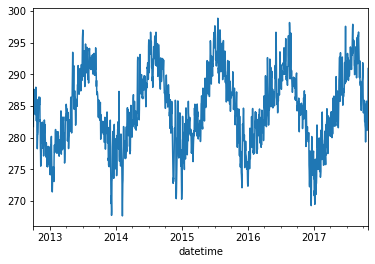

In [37]:
td.Seattle.plot()

In [55]:
td.T.head()

datetime,2012-10-01,2012-10-02,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,...,2017-10-19,2017-10-20,2017-10-21,2017-10-22,2017-10-23,2017-10-24,2017-10-25,2017-10-26,2017-10-27,2017-10-28
Vancouver,284.620769,286.145190,285.528125,284.373333,283.757292,284.825833,285.595833,285.943333,285.957292,284.913958,...,284.930833,282.527917,281.625417,284.360833,283.661667,283.835417,283.138333,283.408333,283.085417,288.01
Portland,282.118197,286.137728,289.599792,286.482500,288.286042,288.291042,288.262500,288.487083,285.193333,284.363958,...,287.291250,283.594583,282.799167,288.096250,284.717500,286.224167,284.360417,287.443750,287.604167,294.52
San Francisco,289.416642,292.958306,296.929167,295.687083,290.635417,290.010417,289.573750,288.510417,288.349792,288.506250,...,287.355833,287.748750,286.190833,287.965833,291.357500,294.937500,294.132917,293.250833,292.830417,302.07
Seattle,281.767262,285.156888,287.673958,284.391667,284.756250,285.674583,286.183333,287.144167,286.707708,285.961250,...,285.753333,282.593750,281.145833,285.717917,284.506667,284.042500,283.101667,284.455833,283.560417,290.92
Los Angeles,291.846501,295.890450,299.008542,295.997917,292.948333,292.368750,292.928750,293.918750,292.440208,291.342708,...,294.295833,292.455000,291.654583,294.630000,299.035000,304.045833,303.296667,298.436250,295.457500,301.52


In [56]:
data_array = td.T.values
data_array.shape
data_array[4]

array([291.84650067, 295.89045049, 299.00854167, ..., 298.43625   ,
       295.4575    , 301.52      ])

In [57]:
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
model.fit(data_array)

TimeSeriesKMeans(max_iter=10, metric='dtw')

In [3]:
warnings.filterwarnings("ignore")
y=model.predict(data_array)

NameError: name 'model' is not defined

In [59]:
x = td.index

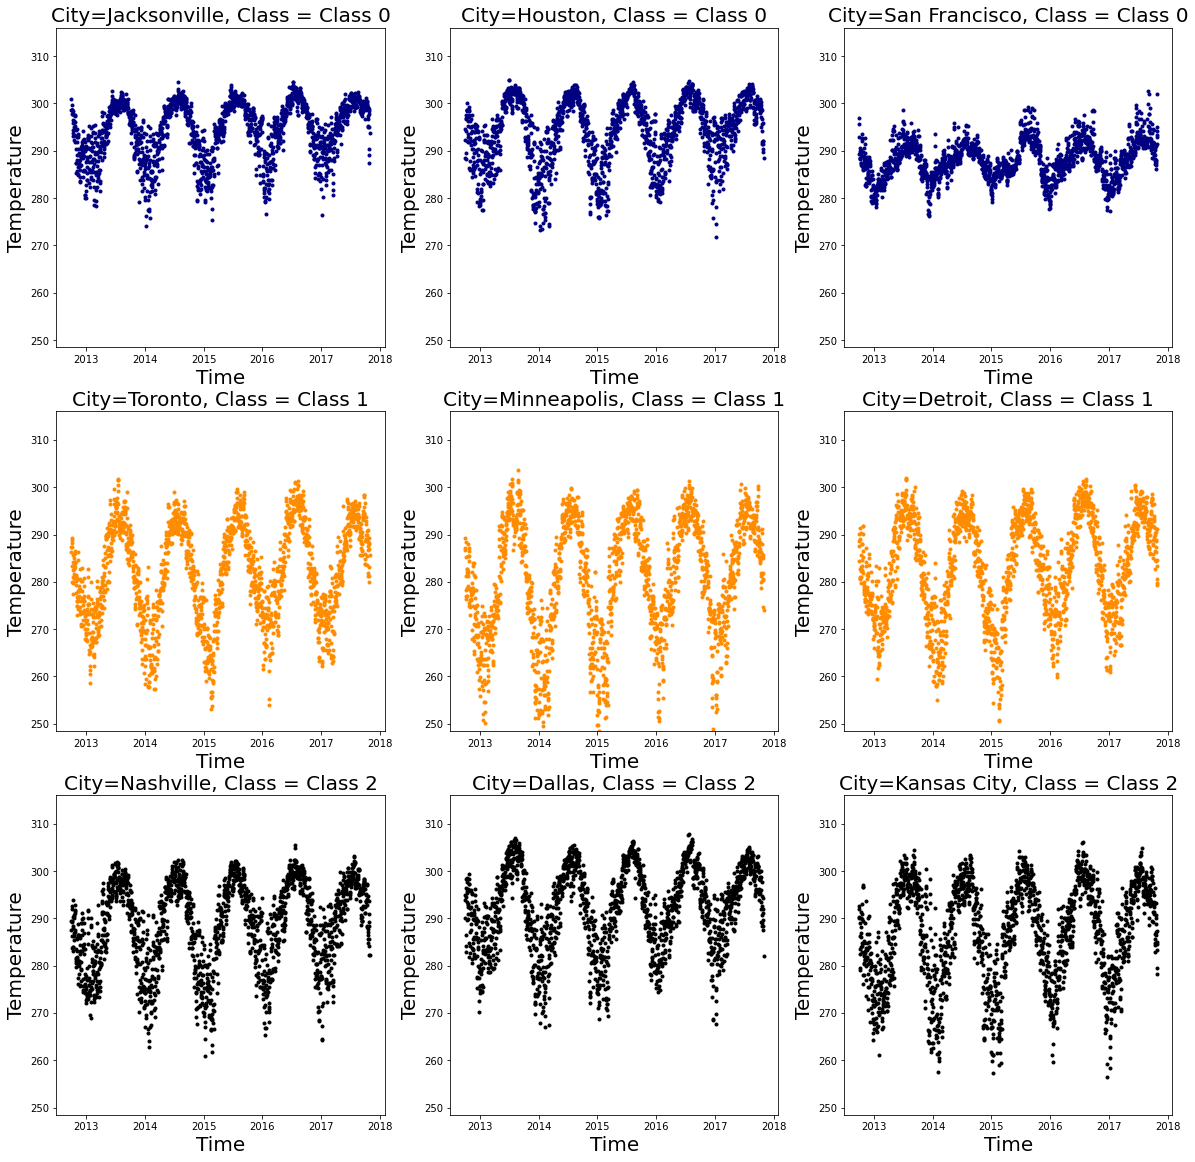

In [60]:
plt.figure(figsize=(20,20))
k_dict = {'1':0,'2':0,'3':0,'4':1,'5':1,'6':1,'7':2,'8':2,'9':2}
colors = ['navy']*3+['darkorange']*3+['k']*3
Names = ['Class 0']*3+['Class 1']*3+['Class 2']*3
for j in range(1,10):
    plt.subplot(3,3,j)
    k = np.random.choice(np.where(y==k_dict[str(j)])[0])
    plt.plot(x,data_array[k],'.',color=colors[j-1])
    plt.ylabel('Temperature',fontsize=20)
    plt.xlabel('Time',fontsize=20)
    plt.title('City=%s, Class = %s'%(cities_list[k],Names[j-1]),fontsize=20)
    plt.ylim(data_array.min(),data_array.max())

<div class="alert alert-info">
- Versuche dich an einem Clustering unser Stromkunden aus dem elec-Datensatz<br>
- Wähle dazu 30 Haushalte / Verbraucher aus<br>
- Verfahre analog zu diesem Beispiel und clustere sie in zwei, drei, und vier Gruppen<br>
- Welches "k" scheint dir am besten zu deinen Daten zu passen?
</div>